In [1]:
import pandas as pd
from operator import itemgetter
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\admin\Desktop\data science learning\7. Projects\10. indian food\indian_food.csv')
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [3]:
df.shape

(255, 9)

In [4]:
df = df[df.state != '-1']
df.shape

(231, 9)

In [5]:
df = df[df.flavor_profile != '-1']
df.shape

(206, 9)

In [6]:
df = df[df.prep_time != '-1']
df.shape

C:\Python\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


(206, 9)

Our goal is to hover all the data pan india - state and region.


In [7]:
df['flavor_profile'].value_counts()

spicy     119
sweet      82
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [8]:
df['course'].value_counts()

main course    98
dessert        79
snack          27
starter         2
Name: course, dtype: int64

<h2>A. Ingredient focused EDA

In [9]:
# no.of total ingredients
def unique_ingredients():
    uniqueingre= []
    for i in range(len(df['ingredients'])):
        for j in df['ingredients'][i].split(','):
            if j not in uniqueingre:
                uniqueingre.append(j)
    return uniqueingre

In [10]:
# Total ingredients per dishes
df['length_of_ingredients'] = df['ingredients'].apply(lambda x: len(x.split(',')))

In [11]:
# value counts of ingredients and no.of total ingredients
Dict = {} 
unique_ingredients= []
for i in range(len(df['ingredients'])):
    for j in df['ingredients'].iloc[i].split(','):
        if j not in unique_ingredients:
            unique_ingredients.append(j)
            count = 0
            for k in range(len(df['ingredients'])):
                if j in df['ingredients'].iloc[k].split(','):
                    count += 1
            Dict[j] = count
        else:
            continue

<h3>A.1 Which are the top 10 most used ingredients in India

Top 10 most used ingredients in India


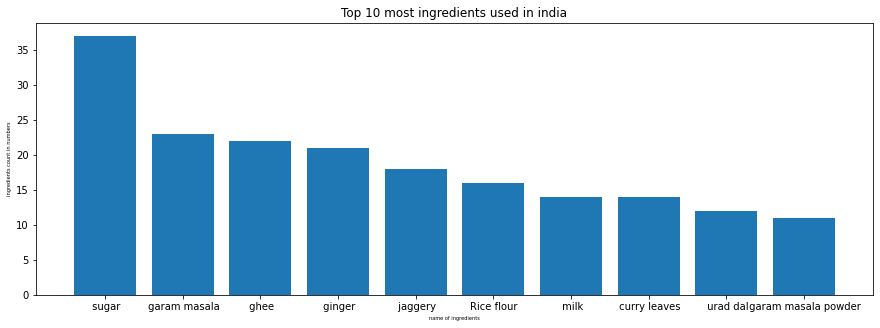

In [118]:
res = dict(sorted(Dict.items(), key = itemgetter(1), reverse = True)[:10]) 
print('Top 10 most used ingredients in India')

# Ploting pie chart
labels = res.keys()
sizes = res.values()  # explode 1st slice
# Plot

plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of ingredients', fontsize=5)
plt.ylabel('ingredients count in numbers', fontsize=5)
plt.title('Top 10 most ingredients used in india')
plt.show()

In [119]:
avg_len = [avg_len_veg, avg_len_nveg]
name = ['vege length', 'non veg length' ]
plt.show()

In [120]:
# creating seperate columns for imp ingredients.
df['sugar'] = df['ingredients'].apply(lambda x: 1 if any("sugar" in word for word in x.split(',')) else 0)
df['ginger'] = df['ingredients'].apply(lambda x: 1 if any("ginger" in word for word in x.split(',')) else 0)
df['garam masala'] = df['ingredients'].apply(lambda x: 1 if any("garam masala" in word for word in x.split(',')) else 0)
df['ghee'] = df['ingredients'].apply(lambda x: 1 if any("ghee" in word for word in x.split(',')) else 0)
df['water'] = df['ingredients'].apply(lambda x: 1 if any("water" in word for word in x.split(',')) else 0)
df['Chicken'] = df['ingredients'].apply(lambda x: 1 if any("Chicken" in word for word in x.split(',')) else 0)
df['milk'] = df['ingredients'].apply(lambda x: 1 if any("milk" in word for word in x.split(',')) else 0)
df['Rice'] = df['ingredients'].apply(lambda x: 1 if any("Rice" in word for word in x.split(',')) else 0)
df['fish'] = df['ingredients'].apply(lambda x: 1 if any("fish" in word for word in x.split(',')) else 0)

<h3>A.2 Ingredients vs states

<h5>A.2.1 Which are the top 10 states using sugar as ingredients in India

In [121]:
# States using most sugar
Dict_sugar = {} 
unique_states= []
for i in range(len(df['state'])):
    sugar_count = 0
    if df['state'].iloc[i] not in unique_states:
        unique_states.append(df['state'].iloc[i])
        
        for j in range(len(df['sugar'])):
            if ((df['state'].iloc[j] == df['state'].iloc[i]) and (df['sugar'].iloc[j] == 1)):
                sugar_count += 1
        Dict_sugar[df['state'].iloc[i]] = sugar_count
    else:
        continue

Top 10 most used states using sugar in India


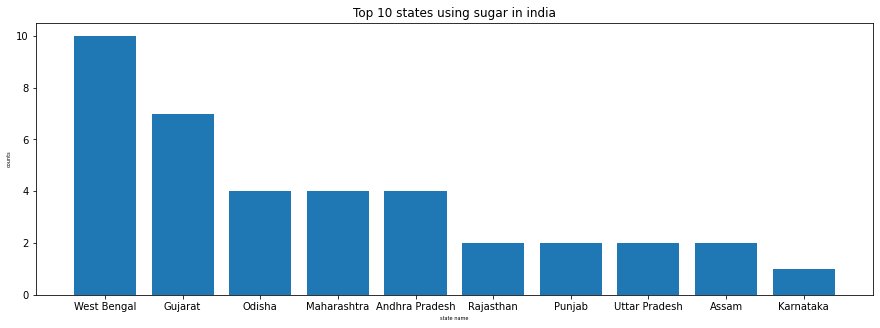

In [122]:
res_sugar = dict(sorted(Dict_sugar.items(), key = itemgetter(1), reverse = True)[:10]) 
print('Top 10 most used states using sugar in India')

# Ploting pie chart
labels = res_sugar.keys()
sizes = res_sugar.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('state name', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('Top 10 states using sugar in india')
plt.show()

<h5>A.2.2 Which are the top 10 states using ginger as ingredients in India

In [16]:
# States using most ginger
Dict_ginger = {} 
unique_state= []
for i in range(len(df['state'])):
    ginger_count = 0
    if df['state'].iloc[i] not in unique_state:
        unique_state.append(df['state'].iloc[i])
        
        for j in range(len(df['ginger'])):
            if ((df['state'].iloc[j] == df['state'].iloc[i]) and (df['ginger'].iloc[j] == 1)):
                ginger_count += 1
        Dict_ginger[df['state'].iloc[i]] = ginger_count
    else:
        continue

Top 10 most used states using ginger in India


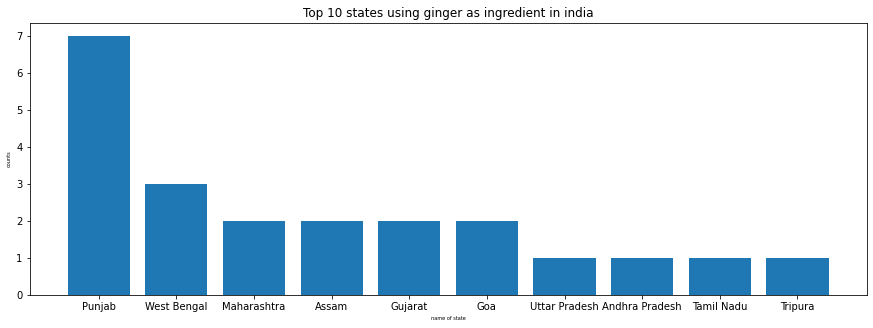

In [123]:
res_ginger = dict(sorted(Dict_ginger.items(), key = itemgetter(1), reverse = True)[:10]) 
print('Top 10 most used states using ginger in India')

# Ploting pie chart
labels = res_ginger.keys()
sizes = res_ginger.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of state', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('Top 10 states using ginger as ingredient in india')
plt.show()

<h5>A.2.3 Which are the top 10 states using garam masala as ingredients in India

In [112]:
# States using most garam masala
Dict_garam_masala = {} 
unique_stat= []
for i in range(len(df['garam masala'])):
    garam_masala_count = 0
    if df['state'].iloc[i] not in unique_stat:
        unique_stat.append(df['garam masala'].iloc[i])
        for j in range(len(df['garam masala'])):
            if ((df['state'].iloc[j] == df['state'].iloc[i]) and (df['garam masala'].iloc[j] == 1)):
                garam_masala_count += 1
        Dict_garam_masala[df['state'].iloc[i]] = garam_masala_count
    else:
        continue

Top 10 most used states using garam masala in India


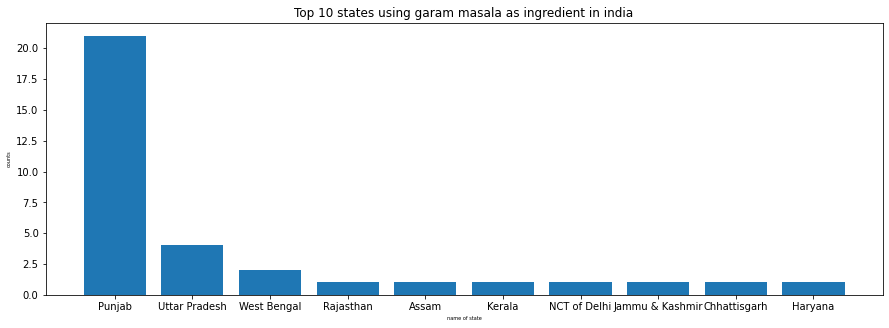

In [124]:
res_garam_masala = dict(sorted(Dict_garam_masala.items(), key = itemgetter(1), reverse = True)[:10]) 
print('Top 10 most used states using garam masala in India')

# Ploting pie chart
labels = res_garam_masala.keys()
sizes = res_garam_masala.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of state', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('Top 10 states using garam masala as ingredient in india')
plt.show()

<h5>A.2.4 Which are the top 10 states using ghee as ingredients in India

In [116]:
# States using most ghee
Dict_ghee = {} 
unique_sta= []
for i in range(len(df['state'])):
    ghee_count = 0
    if df['state'].iloc[i] not in unique_sta:
        unique_sta.append(df['state'].iloc[i])
        
        for j in range(len(df['ghee'])):
            if ((df['state'].iloc[j] == df['state'].iloc[i]) and (df['ghee'].iloc[j] == 1)):
                ghee_count += 1
        Dict_ghee[df['state'].iloc[i]] = ghee_count
    else:
        continue

Top 10 most used states using ghee in India


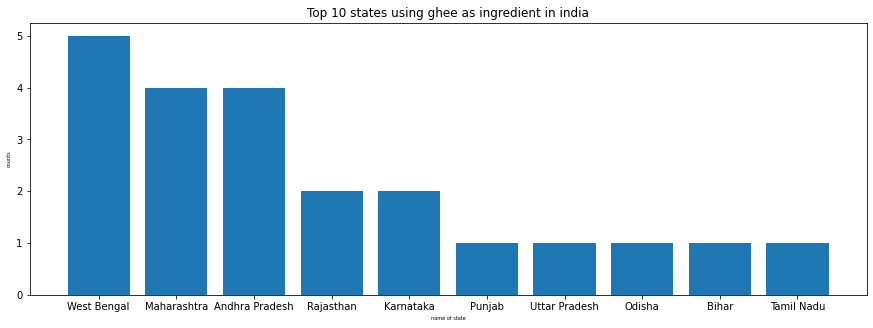

In [125]:
res_ghee = dict(sorted(Dict_ghee.items(), key = itemgetter(1), reverse = True)[:10]) 
print('Top 10 most used states using ghee in India')

# Ploting pie chart
labels = res_ghee.keys()
sizes = res_ghee.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of state', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('Top 10 states using ghee as ingredient in india')
plt.show()

<h5>A.2.5 Which are the top 10 states using water as ingredients in India

In [126]:
# States using most water
Dict_water = {} 
unique_st= []
for i in range(len(df['state'])):
    water_count = 0
    if df['state'].iloc[i] not in unique_st:
        unique_st.append(df['state'].iloc[i])
        
        for j in range(len(df['water'])):
            if ((df['state'].iloc[j] == df['state'].iloc[i]) and (df['water'].iloc[j] == 1)):
                water_count += 1
        Dict_water[df['state'].iloc[i]] = water_count
    else:
        continue

Top 10 most used states using water as ingredient in India


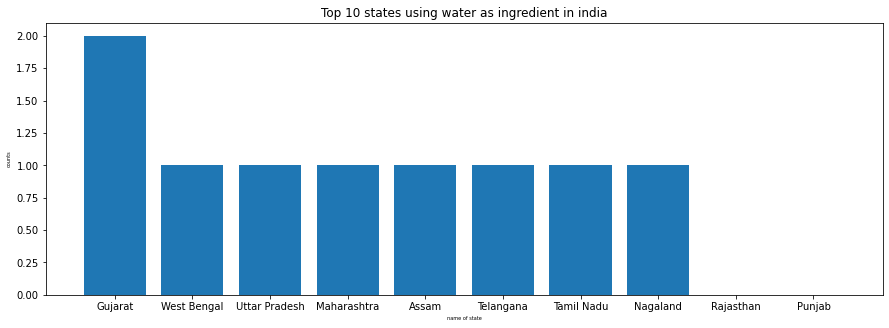

In [127]:
res_water = dict(sorted(Dict_water.items(), key = itemgetter(1), reverse = True)[:10]) 
print('Top 10 most used states using water as ingredient in India')

# Ploting pie chart
labels = res_water.keys()
sizes = res_water.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of state', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('Top 10 states using water as ingredient in india')
plt.show()

<h5>A.2.6 Which are the top 10 states using chicken as ingredients in India

In [24]:
# States using most chicken
Dict_chicken = {} 
unique_s= []
for i in range(len(df['state'])):
    chicken_count = 0
    if df['state'].iloc[i] not in unique_s:
        unique_s.append(df['state'].iloc[i])
        
        for j in range(len(df['Chicken'])):
            if ((df['state'].iloc[j] == df['state'].iloc[i]) and (df['Chicken'].iloc[j] == 1)):
                chicken_count += 1
        Dict_chicken[df['state'].iloc[i]] = chicken_count
    else:
        continue

Top states using chicken as ingredient in India


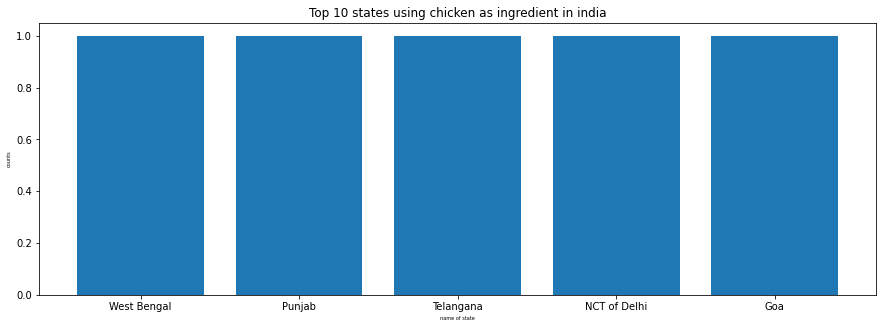

In [129]:
res_chicken = dict(sorted(Dict_chicken.items(), key = itemgetter(1), reverse = True)[:5]) 
print('Top states using chicken as ingredient in India')

# Ploting pie chart
labels = res_chicken.keys()
sizes = res_chicken.values()  # explode 1st slice
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of state', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('Top 10 states using chicken as ingredient in india')
plt.show()

<h5>A.2.7 Which are the top 10 states using milk as ingredients in India

In [130]:
# States using most milk
Dict_milk = {} 
unique_s= []
for i in range(len(df['state'])):
    milk_count = 0
    if df['state'].iloc[i] not in unique_s:
        unique_s.append(df['state'].iloc[i])
        
        for j in range(len(df['milk'])):
            if ((df['state'].iloc[j] == df['state'].iloc[i]) and (df['milk'].iloc[j] == 1)):
                milk_count += 1
        Dict_milk[df['state'].iloc[i]] = milk_count
    else:
        continue

Top 10 states using milk as ingredient in India


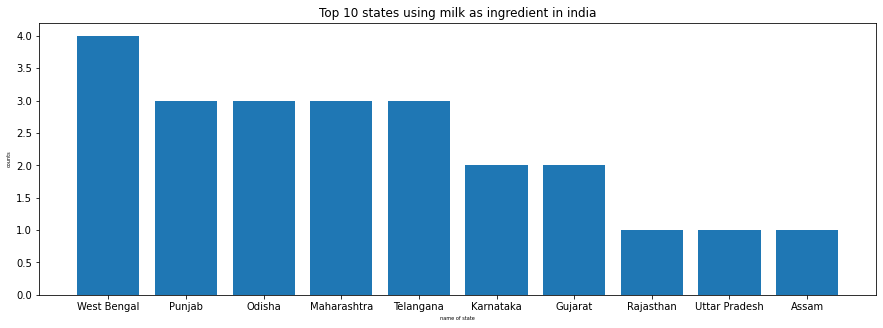

In [131]:
res_milk = dict(sorted(Dict_milk.items(), key = itemgetter(1), reverse = True)[:10]) 
print('Top 10 states using milk as ingredient in India')

# Ploting pie chart
labels = res_milk.keys()
sizes = res_milk.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of state', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('Top 10 states using milk as ingredient in india')
plt.show()

<h5>A.2.8 Which are the top 10 states using rice as ingredients in India

In [132]:
# States using most rice
Dict_rice = {} 
unique= []
for i in range(len(df['state'])):
    rice_count = 0
    if df['state'].iloc[i] not in unique:
        unique.append(df['state'].iloc[i])
        
        for j in range(len(df['Rice'])):
            if ((df['state'].iloc[j] == df['state'].iloc[i]) and (df['Rice'].iloc[j] == 1)):
                rice_count += 1
        Dict_rice[df['state'].iloc[i]] = rice_count
    else:
        continue

Top 10 states using rice as ingredient in India


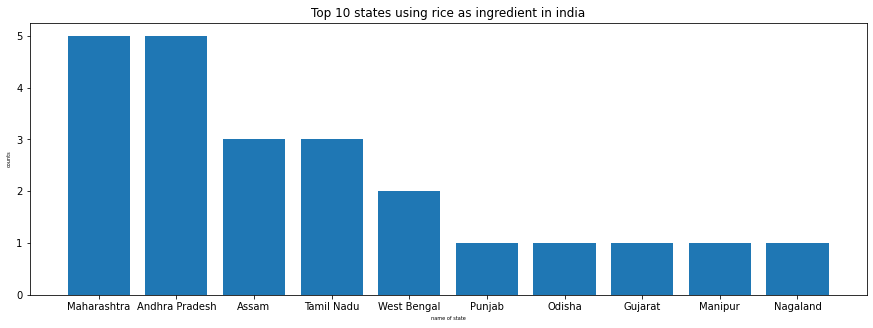

In [133]:
res_rice = dict(sorted(Dict_rice.items(), key = itemgetter(1), reverse = True)[:10]) 
print('Top 10 states using rice as ingredient in India')

# Ploting pie chart
labels = res_rice.keys()
sizes = res_rice.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of state', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('Top 10 states using rice as ingredient in india')
plt.show()

<h5>A.2.10 Which are the top 10 states using fish as ingredients in India

In [134]:
# States using most fish
Dict_fish = {} 
uniqu= []
for i in range(len(df['state'])):
    fish_count = 0
    if df['state'].iloc[i] not in uniqu:
        uniqu.append(df['state'].iloc[i])
        
        for j in range(len(df['fish'])):
            if ((df['state'].iloc[j] == df['state'].iloc[i]) and (df['fish'].iloc[j] == 1)):
                fish_count += 1
        Dict_fish[df['state'].iloc[i]] = fish_count
    else:
        continue

Top states using fish as ingredient in India


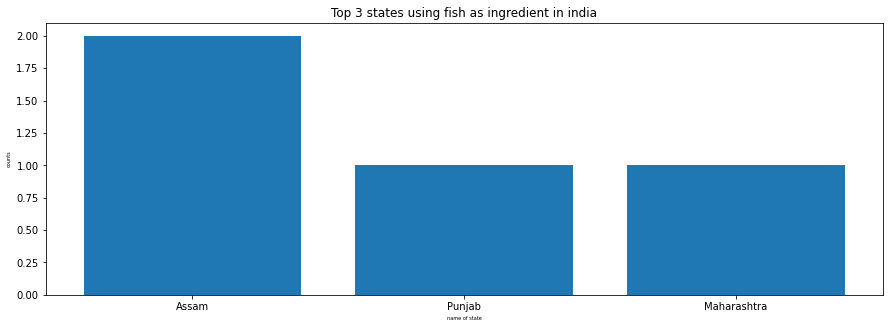

In [136]:
res_fish = dict(sorted(Dict_fish.items(), key = itemgetter(1), reverse = True)[:3]) 
print('Top states using fish as ingredient in India')

# Ploting pie chart
labels = res_fish.keys()
sizes = res_fish.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of state', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('Top 3 states using fish as ingredient in india')
plt.show()

<h5>A.2.11 Top 4 states which make most dishes

In [140]:
df['state'].value_counts()[:4]

Gujarat        32
Punjab         30
Maharashtra    26
West Bengal    22
Name: state, dtype: int64

<h5>A.2.12 Which are the top ingredients Gujaratis use ?

In [141]:
def gujrat():
    unique_state = []
    unique_ingredients = []
    guj = {}  
    for i in range(len(df['ingredients'])):
        for j in df['ingredients'].iloc[i].split(','):
            if j not in unique_ingredients:
                unique_ingredients.append(j)
                count_j = 0
                for k in range(len(df['ingredients'])):
                    if j in df['ingredients'].iloc[k].split(','):
                        if df['state'].iloc[k] == 'Gujarat':
                            count_j += 1
                        else:
                            continue
                    else:
                        continue
                guj[j]  = count_j
            else:
                continue 
    return guj

Top 10 ingredients gujuratis eat


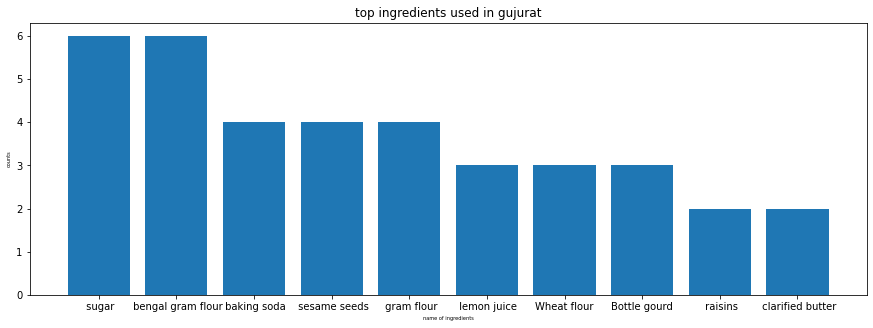

In [142]:
# Top ingredients gujaratis eat
res_guj = dict(sorted(gujrat().items(), key = itemgetter(1), reverse = True)[:10]) 
print('Top 10 ingredients gujuratis eat')

# Ploting pie chart
labels = res_guj.keys()
sizes = res_guj.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of ingredients', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('top ingredients used in gujurat')
plt.show()

<h5>A.2.13 Which are the top ingredients punjabis use ?

In [144]:
def punjab():
    unique_state = []
    unique_ingredients = []
    punjab = {}  
    for i in range(len(df['ingredients'])):
        for j in df['ingredients'].iloc[i].split(','):
            if j not in unique_ingredients:
                unique_ingredients.append(j)
                count_j = 0
                for k in range(len(df['ingredients'])):
                    if j in df['ingredients'].iloc[k].split(','):
                        if df['state'].iloc[k] == 'Punjab':
                            count_j += 1
                        else:
                            continue
                    else:
                        continue
                punjab[j]  = count_j
            else:
                continue 
    return punjab

Top 10 ingredients punjabis eat


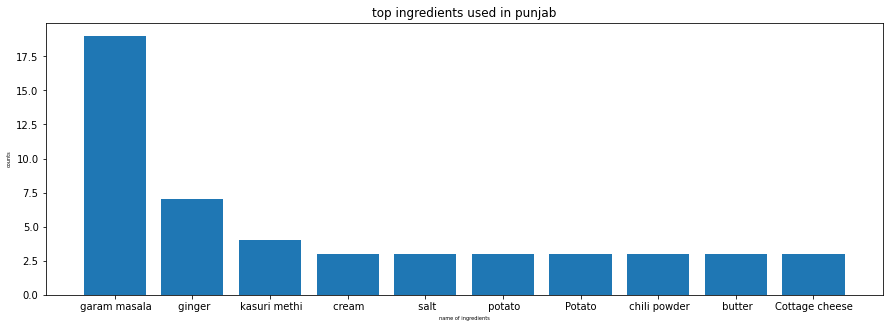

In [145]:
# Top ingredients punjabis eat
res_pun = dict(sorted(punjab().items(), key = itemgetter(1), reverse = True)[:10]) 
print('Top 10 ingredients punjabis eat')

# Ploting pie chart
labels = res_pun.keys()
sizes = res_pun.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of ingredients', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('top ingredients used in punjab')
plt.show()

<h5>A.2.14 Which are the top ingredients Maharashtrians use ?

In [146]:
def maha():
    unique_state = []
    unique_ingredients = []
    maharashtra = {}  
    for i in range(len(df['ingredients'])):
        for j in df['ingredients'].iloc[i].split(','):
            if j not in unique_ingredients:
                unique_ingredients.append(j)
                count_j = 0
                for k in range(len(df['ingredients'])):
                    if j in df['ingredients'].iloc[k].split(','):
                        if df['state'].iloc[k] == 'Maharashtra':
                            count_j += 1
                        else:
                            continue
                    else:
                        continue
                maharashtra[j]  = count_j
            else:
                continue 
    return maharashtra

Top 10 ingredients maharashtrians eat


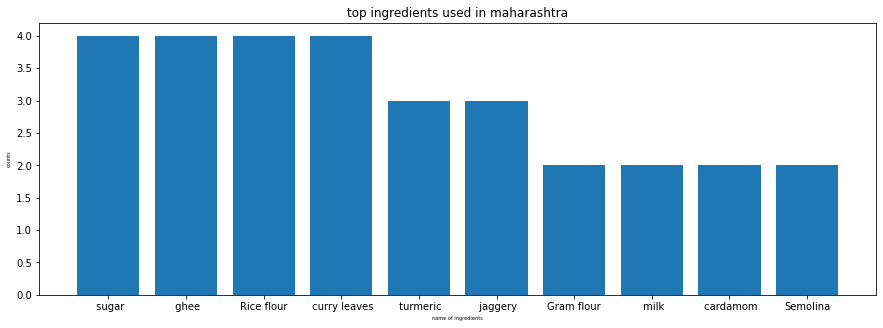

In [147]:
# Top ingredients maharashtrians eat
res_maha = dict(sorted(maha().items(), key = itemgetter(1), reverse = True)[:10]) 
print('Top 10 ingredients maharashtrians eat')

# Ploting pie chart
labels = res_maha.keys()
sizes = res_maha.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of ingredients', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('top ingredients used in maharashtra')
plt.show()

<h5>A.2.15 Which are the top ingredients West bengalis use ?

In [148]:
def beng():
    unique_state = []
    unique_ingredients = []
    bengl = {}  
    for i in range(len(df['ingredients'])):
        for j in df['ingredients'].iloc[i].split(','):
            if j not in unique_ingredients:
                unique_ingredients.append(j)
                count_j = 0
                for k in range(len(df['ingredients'])):
                    if j in df['ingredients'].iloc[k].split(','):
                        if df['state'].iloc[k] == 'West Bengal':
                            count_j += 1
                        else:
                            continue
                    else:
                        continue
                bengl[j]  = count_j
            else:
                continue 
    return bengl

Top 10 ingredients west bengalis eat


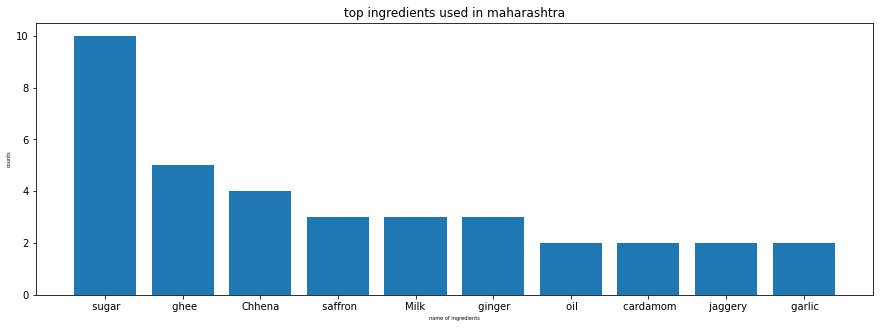

In [149]:
# Top ingredients west bengalis eat
res_benga = dict(sorted(beng().items(), key = itemgetter(1), reverse = True)[:10]) 
print('Top 10 ingredients west bengalis eat')

# Ploting pie chart
labels = res_benga.keys()
sizes = res_benga.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of ingredients', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('top ingredients used in maharashtra')
plt.show()

<h3>A.3 Ingredients vs diet

<h5>A.3.1 Which top 10 ingredients do vegetarians eat the most ?

In [150]:
def veg():
    unique_diet = []
    unique_ingredients = []
    vegetarian = {}  
    for i in range(len(df['ingredients'])):
        for j in df['ingredients'].iloc[i].split(','):
            if j not in unique_ingredients:
                unique_ingredients.append(j)
                count_j = 0
                for k in range(len(df['ingredients'])):
                    if j in df['ingredients'].iloc[k].split(','):
                        if df['diet'].iloc[k] == 'vegetarian':
                            count_j += 1
                        else:
                            continue
                    else:
                        continue
                vegetarian[j]  = count_j
            else:
                continue 
    return vegetarian

Top 10 ingredients vegetarians eat


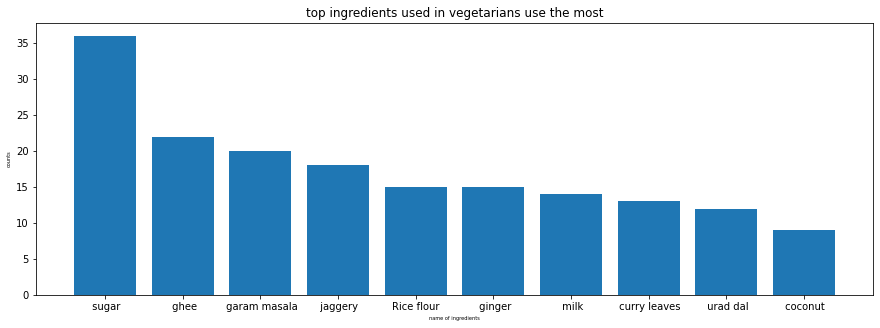

In [151]:
# Top ingredients vegetarians eat
res_veg = dict(sorted(veg().items(), key = itemgetter(1), reverse = True)[:10]) 
print('Top 10 ingredients vegetarians eat')

# Ploting pie chart
labels = res_veg.keys()
sizes = res_veg.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of ingredients', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('top ingredients used in vegetarians use the most')
plt.show()

<h5>A.3.2 Which top 10 ingredients do non vegetarians eat the most ?

In [152]:
def nonveg():
    unique_diet = []
    unique_ingredients = []
    non_veg = {}  
    for i in range(len(df['ingredients'])):
        for j in df['ingredients'].iloc[i].split(','):
            if j not in unique_ingredients:
                unique_ingredients.append(j)
                count_j = 0
                for k in range(len(df['ingredients'])):
                    if j in df['ingredients'].iloc[k].split(','):
                        if df['diet'].iloc[k] == 'non vegetarian':
                            count_j += 1
                        else:
                            continue
                    else:
                        continue
                non_veg[j]  = count_j
            else:
                continue 
    return non_veg

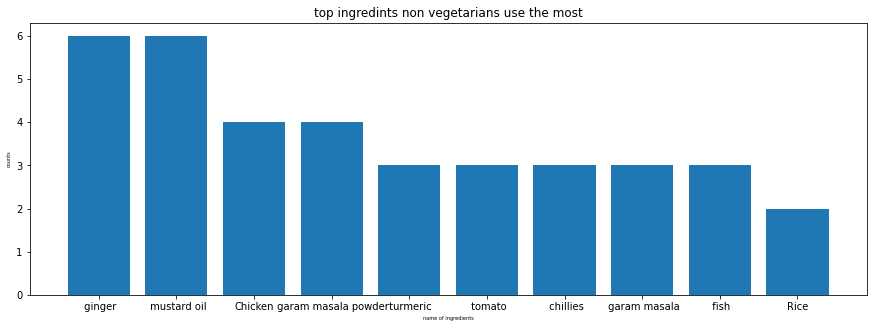

In [153]:
res_non_veg = dict(sorted(nonveg().items(), key = itemgetter(1), reverse = True)[:10]) 
# Ploting pie chart
labels = res_non_veg.keys()
sizes = res_non_veg.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of ingredients', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('top ingredints non vegetarians use the most')
plt.show()

<h3>A.4 Ingredient vs flavour profile

<h5>A.4.1 Which top 10 ingredients do sweet eating people eat the most ?

In [157]:
def sweet():
    unique_sweet = []
    unique_ingredients = []
    sweet= {}  
    for i in range(len(df['ingredients'])):
        for j in df['ingredients'].iloc[i].split(','):
            if j not in unique_ingredients:
                unique_ingredients.append(j)
                count_j = 0
                for k in range(len(df['ingredients'])):
                    if j in df['ingredients'].iloc[k].split(','):
                        if df['flavor_profile'].iloc[k] == 'sweet':
                            count_j += 1
                        else:
                            continue
                    else:
                        continue
                sweet[j]  = count_j
            else:
                continue 
    return sweet

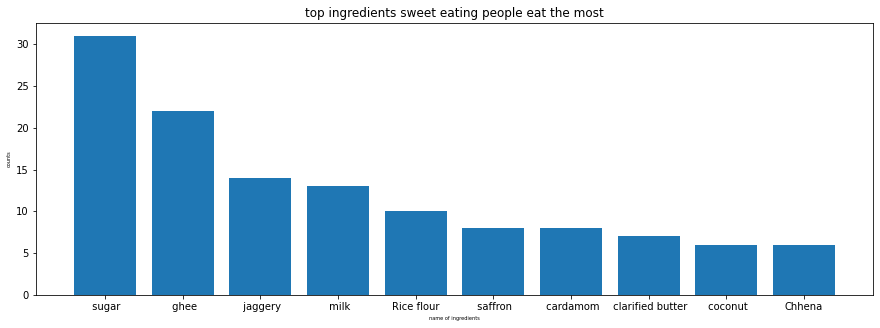

In [156]:
res_sweet = dict(sorted(sweet().items(), key = itemgetter(1), reverse = True)[:10]) 
# Ploting pie chart
labels = res_sweet.keys()
sizes = res_sweet.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of ingredients', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('top ingredients sweet eating people eat the most')
plt.show()

<h5>A.4.2 Which top 10 ingredients do spicy eating people eat the most ?

In [158]:
def spicy():
    unique_spicy = []
    unique_ingredients = []
    spicy= {}  
    for i in range(len(df['ingredients'])):
        for j in df['ingredients'].iloc[i].split(','):
            if j not in unique_ingredients:
                unique_ingredients.append(j)
                count_j = 0
                for k in range(len(df['ingredients'])):
                    if j in df['ingredients'].iloc[k].split(','):
                        if df['flavor_profile'].iloc[k] == 'spicy':
                            count_j += 1
                        else:
                            continue
                    else:
                        continue
                spicy[j]  = count_j
            else:
                continue 
    return spicy

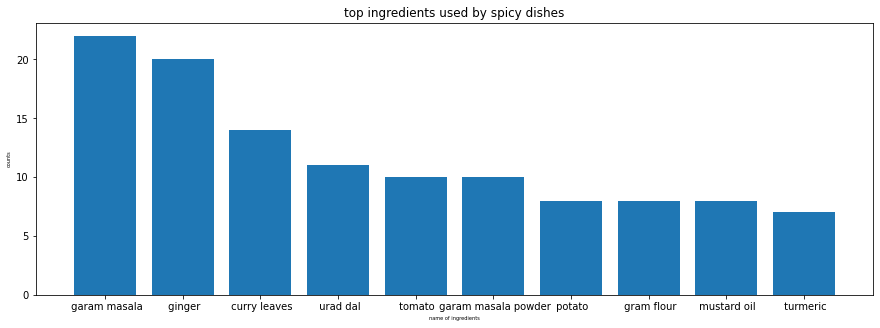

In [159]:
res_spicy = dict(sorted(spicy().items(), key = itemgetter(1), reverse = True)[:10]) 
# Ploting pie chart
labels = res_spicy.keys()
sizes = res_spicy.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of ingredients', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('top ingredients used by spicy dishes')
plt.show()

<h3>A.5 Ingredient vs course

In [160]:
df['course'].value_counts()

main course    98
dessert        79
snack          27
starter         2
Name: course, dtype: int64

<h5>A.5.1 Which top 10 ingredients are used in main course  ?

In [161]:
def maincourse():
    unique_main = []
    unique_ingredients = []
    main= {}  
    for i in range(len(df['ingredients'])):
        for j in df['ingredients'].iloc[i].split(','):
            if j not in unique_ingredients:
                unique_ingredients.append(j)
                count_j = 0
                for k in range(len(df['ingredients'])):
                    if j in df['ingredients'].iloc[k].split(','):
                        if df['course'].iloc[k] == 'main course':
                            count_j += 1
                        else:
                            continue
                    else:
                        continue
                main[j]  = count_j
            else:
                continue 
    return main

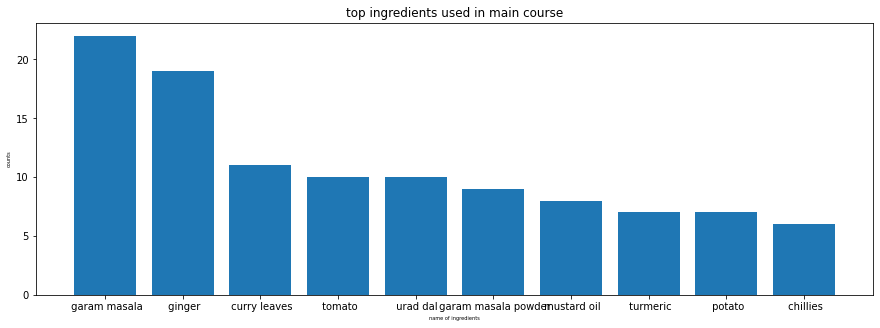

In [162]:
res_main_course = dict(sorted(maincourse().items(), key = itemgetter(1), reverse = True)[:10]) 
# Ploting pie chart
labels = res_main_course.keys()
sizes = res_main_course.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of ingredients', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('top ingredients used in main course')
plt.show()

<h5>A.5.2 Which top 10 ingredients are used in main dessert ?

In [52]:
def dessert():
    unique_dessert = []
    unique_ingredients = []
    dessert= {}  
    for i in range(len(df['ingredients'])):
        for j in df['ingredients'].iloc[i].split(','):
            if j not in unique_ingredients:
                unique_ingredients.append(j)
                count_j = 0
                for k in range(len(df['ingredients'])):
                    if j in df['ingredients'].iloc[k].split(','):
                        if df['course'].iloc[k] == 'dessert':
                            count_j += 1
                        else:
                            continue
                    else:
                        continue
                dessert[j]  = count_j
            else:
                continue 
    return dessert

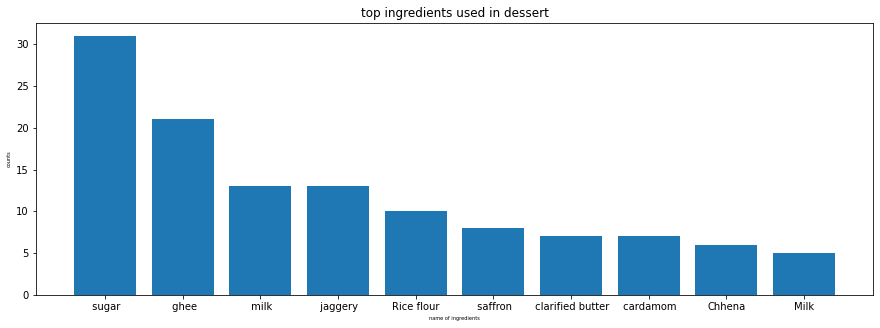

In [163]:
res_dessert = dict(sorted(dessert().items(), key = itemgetter(1), reverse = True)[:10]) 
# Ploting pie chart
labels = res_dessert.keys()
sizes = res_dessert.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of ingredients', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('top ingredients used in dessert')
plt.show()

<h5>A.5.3 Which top 10 ingredients are used in snacks ?

In [164]:
def snack():
    unique_snack = []
    unique_ingredients = []
    snack= {}  
    for i in range(len(df['ingredients'])):
        for j in df['ingredients'].iloc[i].split(','):
            if j not in unique_ingredients:
                unique_ingredients.append(j)
                count_j = 0
                for k in range(len(df['ingredients'])):
                    if j in df['ingredients'].iloc[k].split(','):
                        if df['course'].iloc[k] == 'snack':
                            count_j += 1
                        else:
                            continue
                    else:
                        continue
                snack[j]  = count_j
            else:
                continue 
    return snack

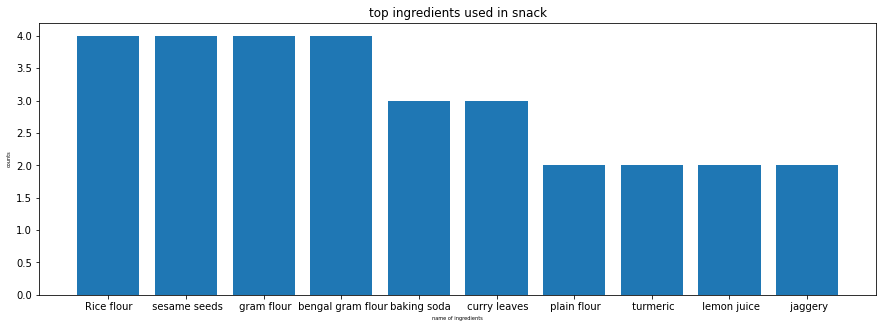

In [165]:
res_snack = dict(sorted(snack().items(), key = itemgetter(1), reverse = True)[:10]) 
# Ploting pie chart
labels = res_snack.keys()
sizes = res_snack.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of ingredients', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('top ingredients used in snack')
plt.show()

<h3>A.6 Ingredient vs region

<h5>A.6.1 Which top 10 ingredients are used in eastern India ?

In [166]:
def east():
    unique_east = []
    unique_ingredients = []
    east= {}  
    for i in range(len(df['ingredients'])):
        for j in df['ingredients'].iloc[i].split(','):
            if j not in unique_ingredients:
                unique_ingredients.append(j)
                count_j = 0
                for k in range(len(df['ingredients'])):
                    if j in df['ingredients'].iloc[k].split(','):
                        if df['region'].iloc[k] == 'East':
                            count_j += 1
                        else:
                            continue
                    else:
                        continue
                east[j]  = count_j
            else:
                continue 
    return east

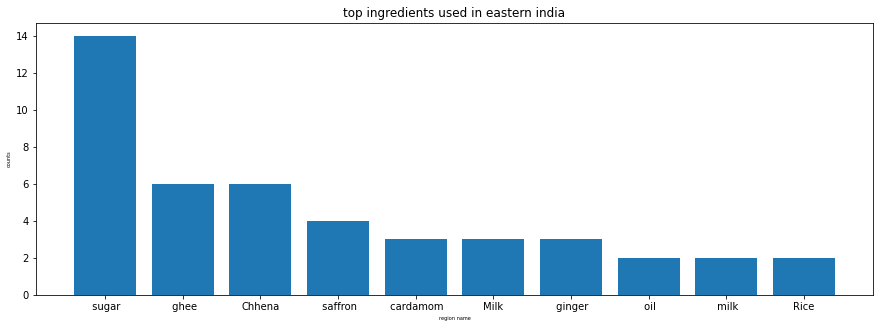

In [168]:
res_east = dict(sorted(east().items(), key = itemgetter(1), reverse = True)[:10]) 
# Ploting pie chart
labels = res_east.keys()
sizes = res_east.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('region name', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('top ingredients used in eastern india')
plt.show()

<h5>A.6.2 Which top 10 ingredients are used in western India ?

In [169]:
def west():
    unique_west = []
    unique_ingredients = []
    west= {}  
    for i in range(len(df['ingredients'])):
        for j in df['ingredients'].iloc[i].split(','):
            if j not in unique_ingredients:
                unique_ingredients.append(j)
                count_j = 0
                for k in range(len(df['ingredients'])):
                    if j in df['ingredients'].iloc[k].split(','):
                        if df['region'].iloc[k] == 'West':
                            count_j += 1
                        else:
                            continue
                    else:
                        continue
                west[j]  = count_j
            else:
                continue 
    return west

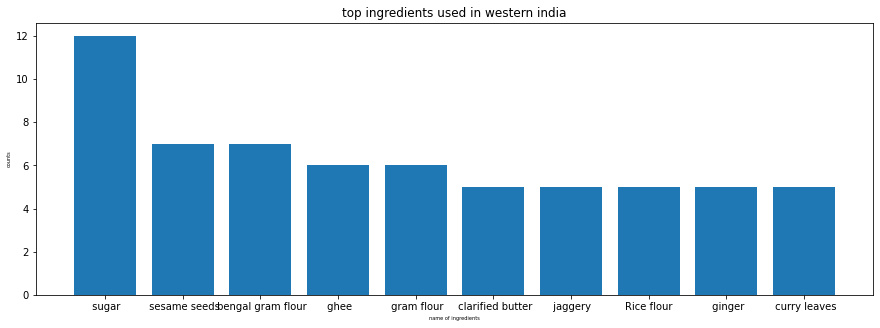

In [170]:
res_west = dict(sorted(west().items(), key = itemgetter(1), reverse = True)[:10]) 
# Ploting pie chart
labels = res_west.keys()
sizes = res_west.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of ingredients', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('top ingredients used in western india')
plt.show()

<h5>A.6.3 Which top 10 ingredients are used in northern India ?

In [60]:
def north():
    unique_north = []
    unique_ingredients = []
    north= {}  
    for i in range(len(df['ingredients'])):
        for j in df['ingredients'].iloc[i].split(','):
            if j not in unique_ingredients:
                unique_ingredients.append(j)
                count_j = 0
                for k in range(len(df['ingredients'])):
                    if j in df['ingredients'].iloc[k].split(','):
                        if df['region'].iloc[k] == 'North':
                            count_j += 1
                        else:
                            continue
                    else:
                        continue
                north[j]  = count_j
            else:
                continue 
    return north

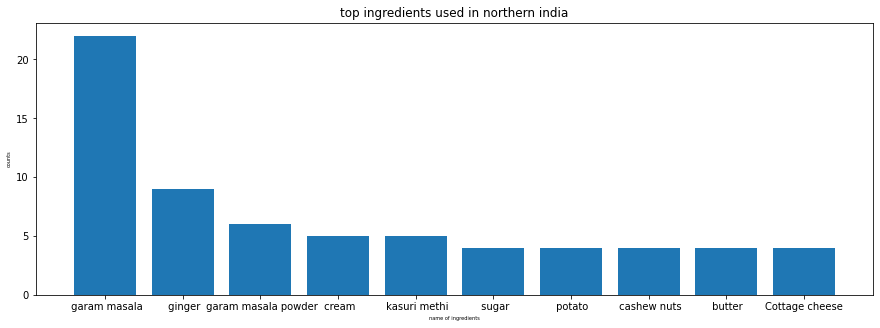

In [171]:
res_north = dict(sorted(north().items(), key = itemgetter(1), reverse = True)[:10]) 
# Ploting pie chart
labels = res_north.keys()
sizes = res_north.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of ingredients', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('top ingredients used in northern india')
plt.show()

<h5>A.6.4 Which top 10 ingredients are used in sourthern India ?

In [172]:
def south():
    unique_south = []
    unique_ingredients = []
    south= {}  
    for i in range(len(df['ingredients'])):
        for j in df['ingredients'].iloc[i].split(','):
            if j not in unique_ingredients:
                unique_ingredients.append(j)
                count_j = 0
                for k in range(len(df['ingredients'])):
                    if j in df['ingredients'].iloc[k].split(','):
                        if df['region'].iloc[k] == 'South':
                            count_j += 1
                        else:
                            continue
                    else:
                        continue
                south[j]  = count_j
            else:
                continue 
    return south

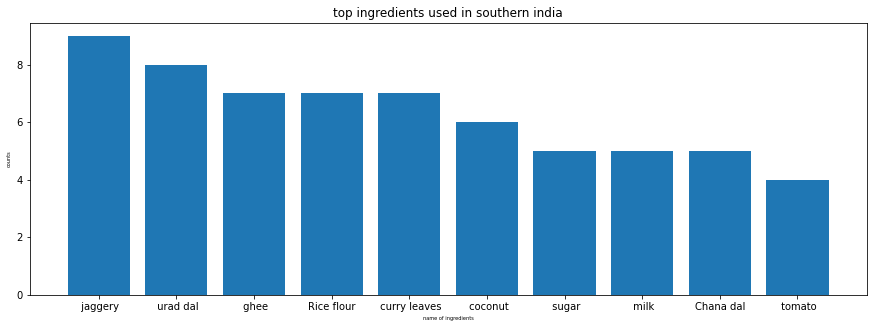

In [173]:
res_south = dict(sorted(south().items(), key = itemgetter(1), reverse = True)[:10]) 
# Ploting pie chart
labels = res_south.keys()
sizes = res_south.values()  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of ingredients', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('top ingredients used in southern india')
plt.show()

<h2>B. Dish name focused EDA

<h5>B.1 Top 10 dish names containing highest number of ingredients 

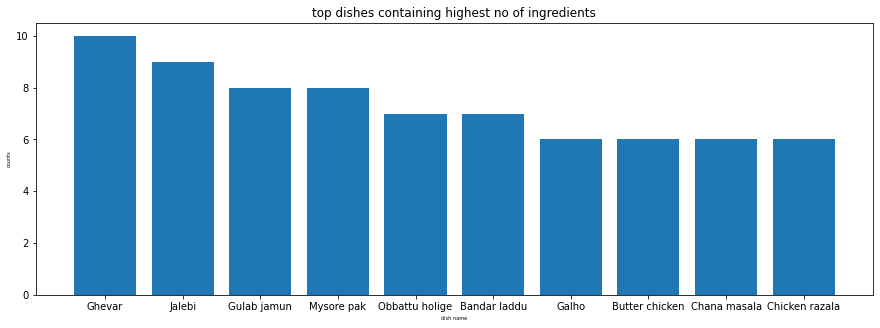

In [176]:
sort_for_ingre =df.sort_values('length_of_ingredients',ascending=False)
key = sort_for_ingre['name'].head(10)
value = sort_for_ingre['length_of_ingredients'].head(10)
labels = key
sizes = value  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('dish name', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('top dishes containing highest no of ingredients')
plt.show()

<h5>B.3 Top 10 dish names requiring highest amount of preparation time 

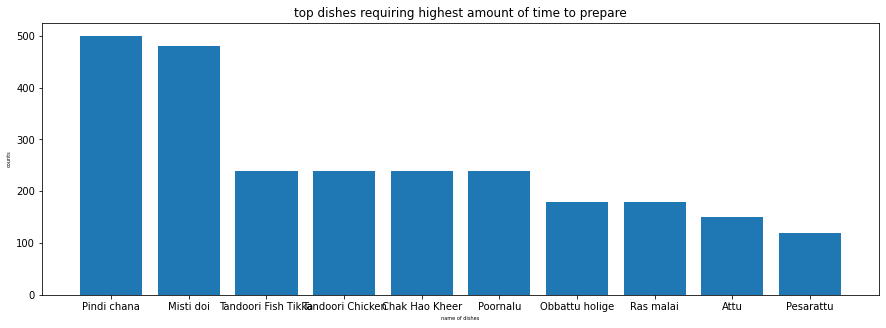

In [177]:
sort_for_preptime =df.sort_values('prep_time',ascending=False)
dict_for_preptime = pd.DataFrame({'name of dish':sort_for_preptime['name'].head(10),'preparation time': sort_for_preptime['prep_time'].head(10)})
key = sort_for_preptime['name'].head(10)
value = sort_for_preptime['prep_time'].head(10)
labels = key
sizes = value  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of dishes', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('top dishes requiring highest amount of time to prepare')
plt.show()

<h5>B.4 Top 10 dish names requiring highest amount of cook time 

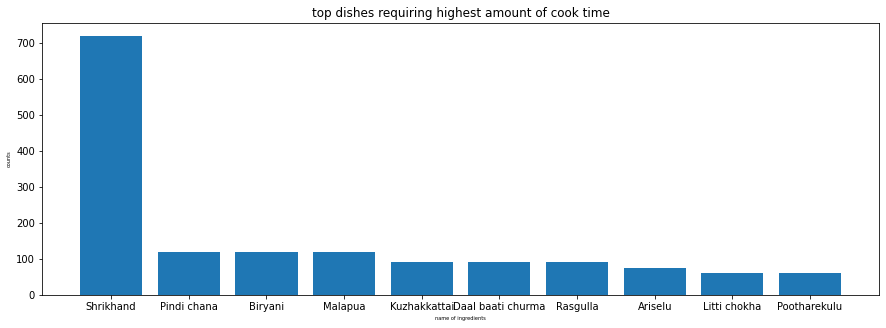

In [178]:
sort_for_cooktime =df.sort_values('cook_time ',ascending=False)
dict_for_cooktime = pd.DataFrame({'name of dish':sort_for_cooktime['name'].head(10),'cook time': sort_for_cooktime['cook_time '].head(10)})
key = sort_for_cooktime['name'].head(10)
value = sort_for_cooktime['cook_time '].head(10)
labels = key
sizes = value  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('name of ingredients', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('top dishes requiring highest amount of cook time')
plt.show()

<h2>C. Diet focused EDA

<h5>C.1 How many are vegetarian dishes and non vegetarian dishes ?

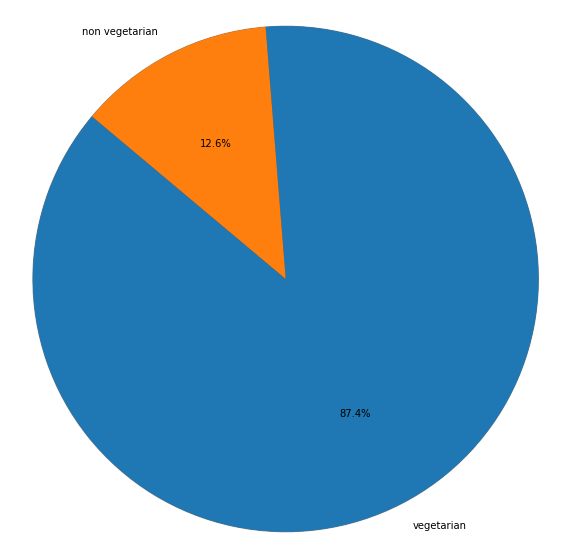

In [67]:
labels = ['vegetarian','non vegetarian']
sizes = [180,26]  # explode 1st slice
# Plot
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140, radius = 100.56)
plt.axis('equal')
plt.show()

<h5>C.2 What is the average preparation time for vegetarian and non vegetarian dishes ?

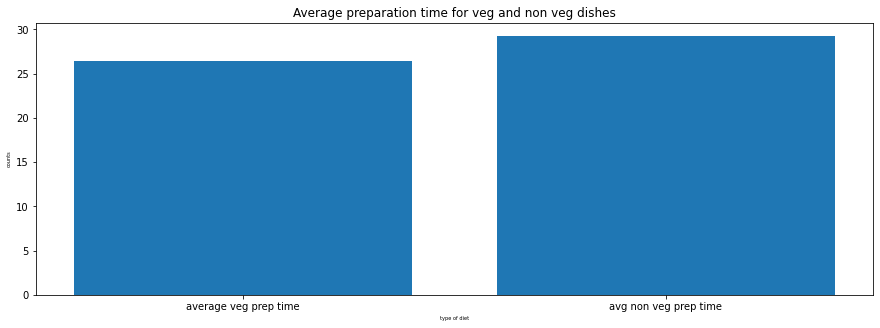

In [181]:
veg_prep_time = []
non_veg_prep_time = []
for i in range(len(df['diet'])):
    if df['diet'].iloc[i] == 'vegetarian':
        veg_prep_time.append(df['prep_time'].iloc[i])
    elif df['diet'].iloc[i] == 'non vegetarian':
        non_veg_prep_time.append(df['prep_time'].iloc[i])
avg_veg_prep_time = sum(veg_prep_time) / len(veg_prep_time)
avg_non_veg_prep_time = sum(non_veg_prep_time) / len(non_veg_prep_time)
labels = ['average veg prep time','avg non veg prep time']
sizes = [avg_veg_prep_time,avg_non_veg_prep_time]  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('type of diet', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('Average preparation time for veg and non veg dishes')
plt.show()

<h5>C.3 What is the average cooking time for vegetarian and non vegetarian dishes ??

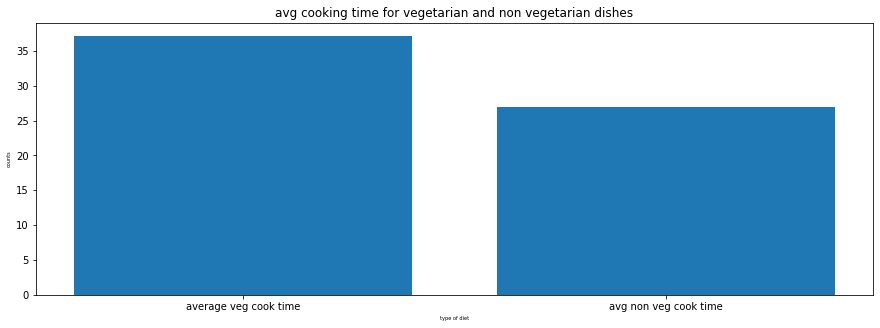

In [182]:
veg_cook_time = []
non_veg_cook_time = []
for i in range(len(df['diet'])):
    if df['diet'].iloc[i] == 'vegetarian':
        veg_cook_time.append(df['cook_time '].iloc[i])
    elif df['diet'].iloc[i] == 'non vegetarian':
        non_veg_cook_time.append(df['cook_time '].iloc[i])
avg_veg_cook_time = sum(veg_cook_time) / len(veg_cook_time)
avg_non_veg_cook_time = sum(non_veg_cook_time) / len(non_veg_cook_time)
labels = ['average veg cook time','avg non veg cook time']
sizes = [avg_veg_cook_time,avg_non_veg_cook_time]  # explode 1st slice
# Plot
plt.figure(figsize=(15,5))
plt.bar(labels,sizes)
plt.xlabel('type of diet', fontsize=5)
plt.ylabel('counts', fontsize=5)
plt.title('avg cooking time for vegetarian and non vegetarian dishes')
plt.show()

<h5>C.4 What is the average length of ingredients for vegetarian and non vegetarian dishes ??

In [183]:
veg_len_ingre = []
non_veg_len_ingre = []
for i in range(len(df['diet'])):
    if df['diet'].iloc[i] == 'vegetarian':
        veg_len_ingre.append(df['length_of_ingredients'].iloc[i])
    elif df['diet'].iloc[i] == 'non vegetarian':
        non_veg_len_ingre.append(df['length_of_ingredients'].iloc[i])
avg_veg_len_ingre = sum(veg_len_ingre) / len(veg_len_ingre)
avg_non_veg_len_ingre = sum(non_veg_len_ingre) / len(non_veg_len_ingre)

In [71]:
avg_veg_len_ingre

4.338888888888889

In [72]:
avg_non_veg_len_ingre 

5.153846153846154

<h5>C.5 What are the flavour profiles of veg and non veg

In [73]:
vegt = {}
nvegt = {}
sweet_vegcount = 0
spicy_vegcount = 0
sweet_nonvegcount = 0
spicy_nonvegcount = 0
for i in range(len(df['diet'])):
    if (df['diet'].iloc[i] == 'vegetarian' and df['flavor_profile'].iloc[i] == 'sweet'):
        sweet_vegcount += 1
    elif (df['diet'].iloc[i] == 'vegetarian' and df['flavor_profile'].iloc[i] == 'spicy'):
        spicy_vegcount += 1
    elif (df['diet'].iloc[i] == 'non vegetarian' and df['flavor_profile'].iloc[i] == 'sweet'):
        sweet_nonvegcount += 1
    elif (df['diet'].iloc[i] == 'non vegetarian' and df['flavor_profile'].iloc[i] == 'spicy'):
        spicy_nonvegcount += 1
vegt['sweet'] = sweet_vegcount
vegt['spicy'] = spicy_vegcount
nvegt['sweet'] = sweet_nonvegcount
nvegt['spicy'] = spicy_nonvegcount
    

distribution of vegetarians w.r.t sweet and spicy flavour profiles


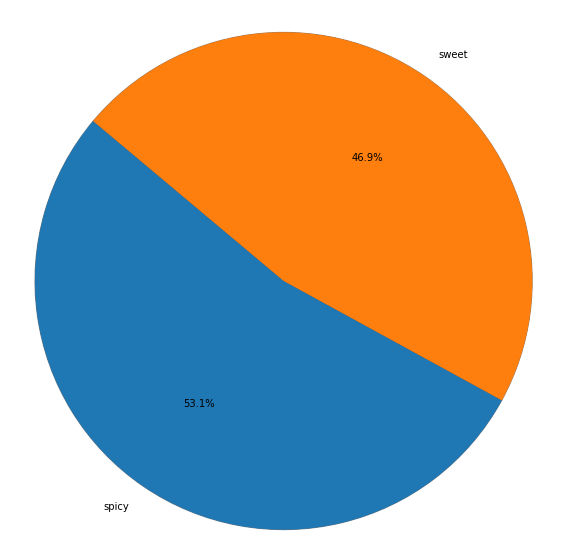

In [74]:
# Sweet and spicy falvour profile for vegetarians
res_vegt = dict(sorted(vegt.items(), key = itemgetter(1), reverse = True)[:10]) 
print('distribution of vegetarians w.r.t sweet and spicy flavour profiles')
labels = res_vegt.keys()
sizes = res_vegt.values() # explode 1st slice
# Plot
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140, radius = 100.56)
plt.axis('equal')
plt.show()

distribution of non vegetarians w.r.t sweet and spicy flavour profiles


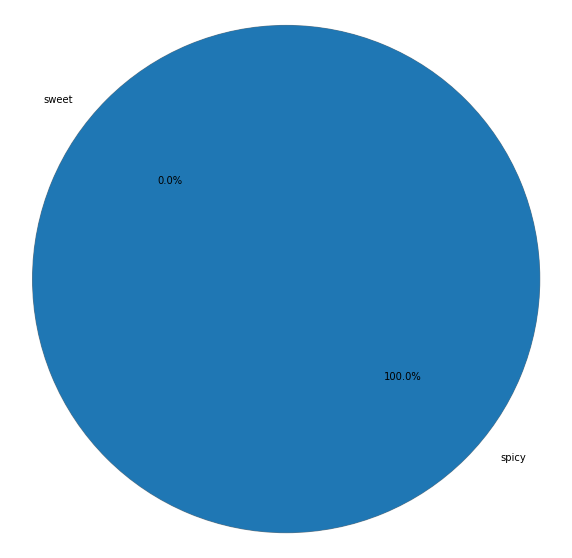

In [184]:
# Sweet and spicy flavour profile for non vegetarians
res_nvegt = dict(sorted(nvegt.items(), key = itemgetter(1), reverse = True)[:10]) 
print('distribution of non vegetarians w.r.t sweet and spicy flavour profiles')
labels = res_nvegt.keys()
sizes = res_nvegt.values() # explode 1st slice
# Plot
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140, radius = 100.56)
plt.axis('equal')
plt.show()

<h5>C.6 Vegetarians dishes distributed accross the course of meal

In [185]:
main_vcount = 0
dessert_vcount = 0
snack_vcount = 0
main_nvcount = 0
dessert_nvcount = 0
snack_nvcount = 0
for i in range(len(df['course'])):
    if (df['diet'].iloc[i] == 'vegetarian') & (df['course'].iloc[i] == 'main course'):
        main_vcount += 1
    elif (df['diet'].iloc[i] == 'vegetarian') & (df['course'].iloc[i] == 'dessert'):
        dessert_vcount += 1
    elif (df['diet'].iloc[i] == 'vegetarian') & (df['course'].iloc[i] == 'snack'):
        snack_vcount += 1
    elif (df['diet'].iloc[i] == 'non vegetarian') & (df['course'].iloc[i] == 'main course'):
        main_nvcount += 1
    elif (df['diet'].iloc[i] == 'non vegetarian') & (df['course'].iloc[i] == 'dessert'):
        dessert_nvcount += 1
    elif (df['diet'].iloc[i] == 'non vegetarian') & (df['course'].iloc[i] == 'snack'):
        snack_nvcount += 1
vege = {}
nvege = {}
vege['main'] = main_vcount
vege['dessert'] = dessert_vcount
vege['snack'] = snack_vcount
nvege['main'] = main_nvcount
nvege['dessert'] = dessert_nvcount
nvege['snack'] = snack_nvcount

distribution of vegetarian dishes w.r.t course


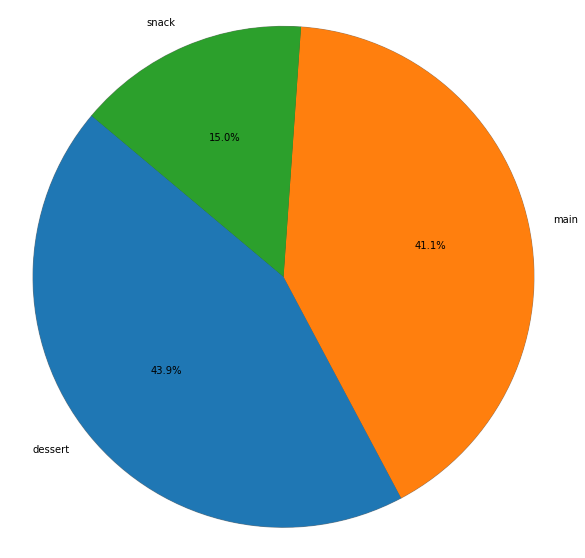

In [186]:
res_vege = dict(sorted(vege.items(), key = itemgetter(1), reverse = True)) 
print('distribution of vegetarian dishes w.r.t course')
labels = res_vege.keys()
sizes = res_vege.values() # explode 1st slice
# Plot
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140, radius = 100.56)
plt.axis('equal')
plt.show()

distribution of non vegetarians w.r.t courses


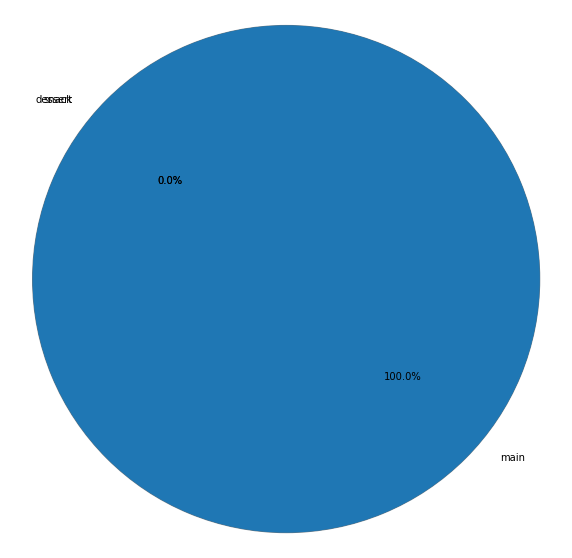

In [187]:
res_nvege = dict(sorted(nvege.items(), key = itemgetter(1), reverse = True)) 
print('distribution of non vegetarians w.r.t courses')
labels = res_nvege.keys()
sizes = res_nvege.values() # explode 1st slice
# Plot
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140, radius = 100.56)
plt.axis('equal')
plt.show()

<h5>C.6 Top states having most no. of vegetarian dishes

In [188]:
guj_count = 0
pun_count = 0
maha_count =0
wbengal_count = 0
assam_count = 0
tamil_count = 0
andra_count = 0
guj_ncount = 0
pun_ncount = 0
maha_ncount =0
wbengal_ncount = 0
assam_ncount = 0
tamil_ncount = 0
andra_ncount = 0
for i in range(len(df['state'])):
    if (df['diet'].iloc[i] == 'vegetarian') & (df['state'].iloc[i] == 'Gujurat'):
        guj_count += 1
    elif (df['diet'].iloc[i] == 'vegetarian') & (df['state'].iloc[i] == 'Punjab'):
        pun_count += 1
    elif (df['diet'].iloc[i] == 'vegetarian') & (df['state'].iloc[i] == 'Maharashtra'):
        maha_count += 1
    elif (df['diet'].iloc[i] == 'vegetarian') & (df['state'].iloc[i] == 'West bengal'):
        wbengal_count += 1
    elif (df['diet'].iloc[i] == 'vegetarian') & (df['state'].iloc[i] == 'Assam'):
        assam_count += 1
    elif (df['diet'].iloc[i] == 'vegetarian') & (df['state'].iloc[i] == 'Andhra Pradesh'):
        andra_count += 1
    elif (df['diet'].iloc[i] == 'vegetarian') & (df['state'].iloc[i] == 'Tamil Nadu'):
        tamil_count += 1
    elif (df['diet'].iloc[i] == 'non vegetarian') & (df['state'].iloc[i] == 'Gujurat'):
        guj_ncount += 1
    elif (df['diet'].iloc[i] == 'non vegetarian') & (df['state'].iloc[i] == 'Punjab'):
        pun_ncount += 1
    elif (df['diet'].iloc[i] == 'non vegetarian') & (df['state'].iloc[i] == 'Maharashtra'):
        maha_ncount += 1
    elif (df['diet'].iloc[i] == 'non vegetarian') & (df['state'].iloc[i] == 'West bengal'):
        wbengal_ncount += 1
    elif (df['diet'].iloc[i] == 'non vegetarian') & (df['state'].iloc[i] == 'Tamil Nadu'):
        tamil_ncount += 1
    elif (df['diet'].iloc[i] == 'non vegetarian') & (df['state'].iloc[i] == 'Andhra Pradesh'):
        andra_ncount += 1
    elif (df['diet'].iloc[i] == 'non vegetarian') & (df['state'].iloc[i] == 'Assam'):
        assam_ncount += 1
veg_state = {}
nveg_state = {}
veg_state['gujrat'] = guj_count
veg_state['punjab'] = pun_count
veg_state['maharashtra'] = maha_count
veg_state['West bengal'] = wbengal_count
veg_state['Assam'] = assam_count
veg_state['Andra pradesh'] = andra_count
veg_state['tamil nadu'] = tamil_count
nveg_state['gujrat'] = guj_ncount
nveg_state['punjab'] = pun_ncount
nveg_state['maharashtra'] = maha_ncount
nveg_state['West bengal'] = wbengal_ncount
nveg_state['Assam'] = assam_ncount
nveg_state['Andra pradesh'] = andra_ncount
nveg_state['tamil nadu'] = tamil_ncount

distribution of vegetarians w.r.t top states


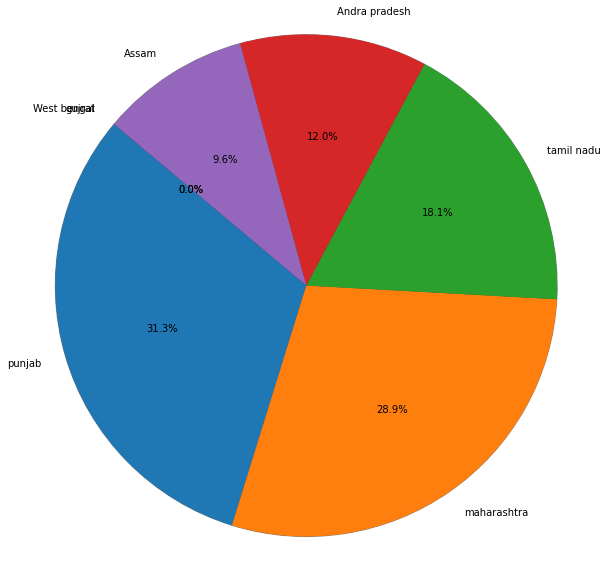

In [189]:
res_veg_state = dict(sorted(veg_state.items(), key = itemgetter(1), reverse = True)) 
print('distribution of vegetarians w.r.t top states')
labels = res_veg_state.keys()
sizes = res_veg_state.values() # explode 1st slice
# Plot
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140, radius = 100.56)
plt.axis('equal')
plt.show()

<h5>C.7 Top states having most no. of non vegetarian dishes

distribution of non vegetarians w.r.t states


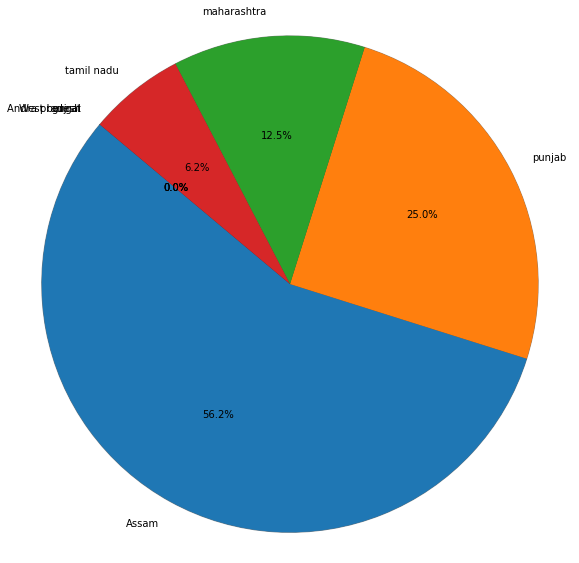

In [190]:
res_nveg_state = dict(sorted(nveg_state.items(), key = itemgetter(1), reverse = True)) 
print('distribution of non vegetarians w.r.t states')
labels = res_nveg_state.keys()
sizes = res_nveg_state.values() # explode 1st slice
# Plot
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140, radius = 100.56)
plt.axis('equal')
plt.show()

<h5>C.8 Distribution of diet w.r.t regions

In [191]:
east_count = 0
west_count = 0
north_count = 0
south_count = 0
east_ncount = 0
west_ncount = 0
north_ncount = 0
south_ncount = 0
for i in range(len(df['course'])):
    if (df['diet'].iloc[i] == 'vegetarian') & (df['region'].iloc[i] == 'East'):
        east_count += 1
    elif (df['diet'].iloc[i] == 'vegetarian') & (df['region'].iloc[i] == 'West'):
        west_count += 1
    elif (df['diet'].iloc[i] == 'vegetarian') & (df['region'].iloc[i] == 'North'):
        north_count += 1
    elif (df['diet'].iloc[i] == 'vegetarian') & (df['region'].iloc[i] == 'South'):
        south_count += 1
    elif (df['diet'].iloc[i] == 'non vegetarian') & (df['region'].iloc[i] == 'East'):
        east_ncount += 1
    elif (df['diet'].iloc[i] == 'non vegetarian') & (df['region'].iloc[i] == 'West'):
        west_ncount += 1
    elif (df['diet'].iloc[i] == 'non vegetarian') & (df['region'].iloc[i] == 'North'):
        north_ncount += 1
    elif (df['diet'].iloc[i] == 'non vegetarian') & (df['region'].iloc[i] == 'South'):
        south_ncount += 1
        
vege_re = {}
nvege_re = {}
vege_re['east'] =east_count 
vege_re['west'] = west_count
vege_re['north'] = north_count
vege_re['south'] = south_count
nvege_re['east'] =east_ncount 
nvege_re['west'] = west_ncount
nvege_re['north'] = north_ncount
nvege_re['south'] = south_ncount

<h5>C.9 Distribution of vegetarian diet w.r.t regions

distribution of vegetarians w.r.t region


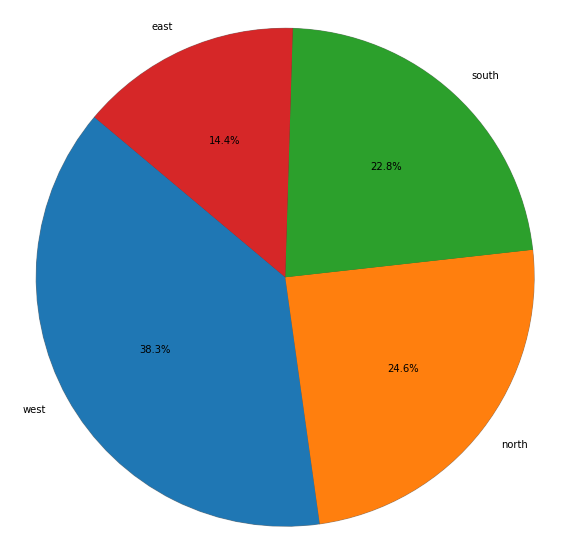

In [192]:
res_veg_re = dict(sorted(vege_re.items(), key = itemgetter(1), reverse = True)) 
print('distribution of vegetarians w.r.t region')
labels = res_veg_re.keys()
sizes = res_veg_re.values() # explode 1st slice
# Plot
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140, radius = 100.56)
plt.axis('equal')
plt.show()

<h5>C.9 Distribution of non vegetarian diet w.r.t regions

distribution of vegetarians w.r.t region


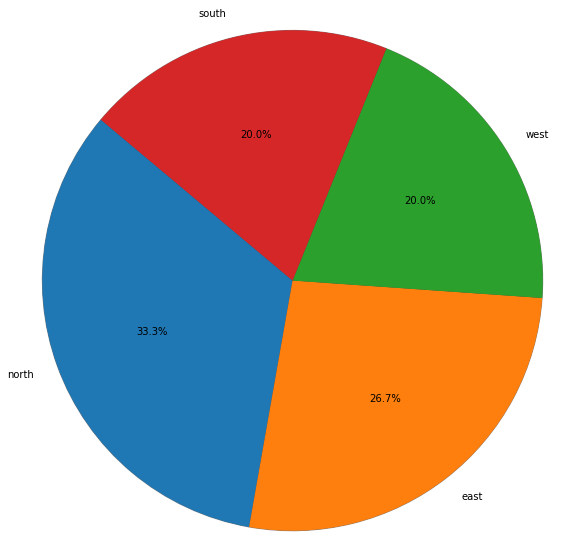

In [193]:
res_nvege_re = dict(sorted(nvege_re.items(), key = itemgetter(1), reverse = True)) 
print('distribution of vegetarians w.r.t region')
labels = res_nvege_re.keys()
sizes = res_nvege_re.values() # explode 1st slice
# Plot
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140, radius = 100.56)
plt.axis('equal')
plt.show()